By: Dominikus Krisna Herlambang | ©2024

# Part 1 : Data import and manipulation

In [ ]:
import pandas as pd
import numpy as np

file = r'data_geology.csv'
df = pd.read_csv(file, sep=',')
df.describe()

,Depth,Mg,Al,Si,P,S,K,Ca,Ti,V,...,Cd,Sn,Sb,Ba,W,Hg,Pb,Bi,Th,U
count,1118.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,...,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.500000,926.646664,72037.620668,216966.964236,627.023763,144537.688947,5035.137107,9787.410616,2572.107210,55.713532,...,337.260808,331.111300,254.401748,50639.474897,122.231848,128.817999,1078.030565,183.667734,121.741358,59.789948
std,322.883106,4432.651876,46456.715345,139781.935503,650.491039,118453.401674,7697.319968,13387.038046,1908.216808,213.416531,...,436.895602,349.748001,740.514021,93590.986108,253.293064,253.316833,3366.997814,368.264364,246.156356,190.780314
min,0.000000,0.000000,2021.823072,3488.756163,0.000000,0.000000,0.000000,679.376592,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.250000,0.000000,39682.734756,80839.000967,0.000000,42096.218444,865.336160,3149.905213,1451.668836,0.000000,...,0.000000,0.000000,0.000000,1059.124261,0.000000,0.000000,364.680757,0.000000,0.000000,0.000000
50%,558.500000,0.000000,67499.157868,231369.524175,592.655446,110601.571777,1815.265714,5091.625281,2561.282499,0.000000,...,80.152664,232.873644,0.000000,3384.651244,0.000000,0.000000,644.421404,0.000000,0.000000,0.000000
75%,837.750000,0.000000,96918.252787,347085.844428,994.288242,238030.581630,4841.312386,11383.390035,3594.989970,0.000000,...,641.543815,625.395098,286.091534,54526.989104,0.000000,94.404945,896.768627,157.242610,68.961271,0.000000
max,1117.000000,51507.837522,268303.961902,458711.316892,6412.890328,484652.146863,49974.352666,245437.048242,11809.241642,1765.366401,...,3537.568033,1811.037284,15423.383571,542492.041491,1102.660319,942.953581,82254.068657,2669.860482,962.827656,1012.563394


In [ ]:
columns = [col for col in df.columns if col not in ['Depth', 'BHID']]

for col in columns:
    df.loc[df[col] > 0,[col]] = df.loc[df[col] > 0][col] + np.random.uniform(low=0, high=df['Mg'].mean(),
                                                                             size=(len(df.loc[df[col] > 0])))

# Part 2: Data visualization

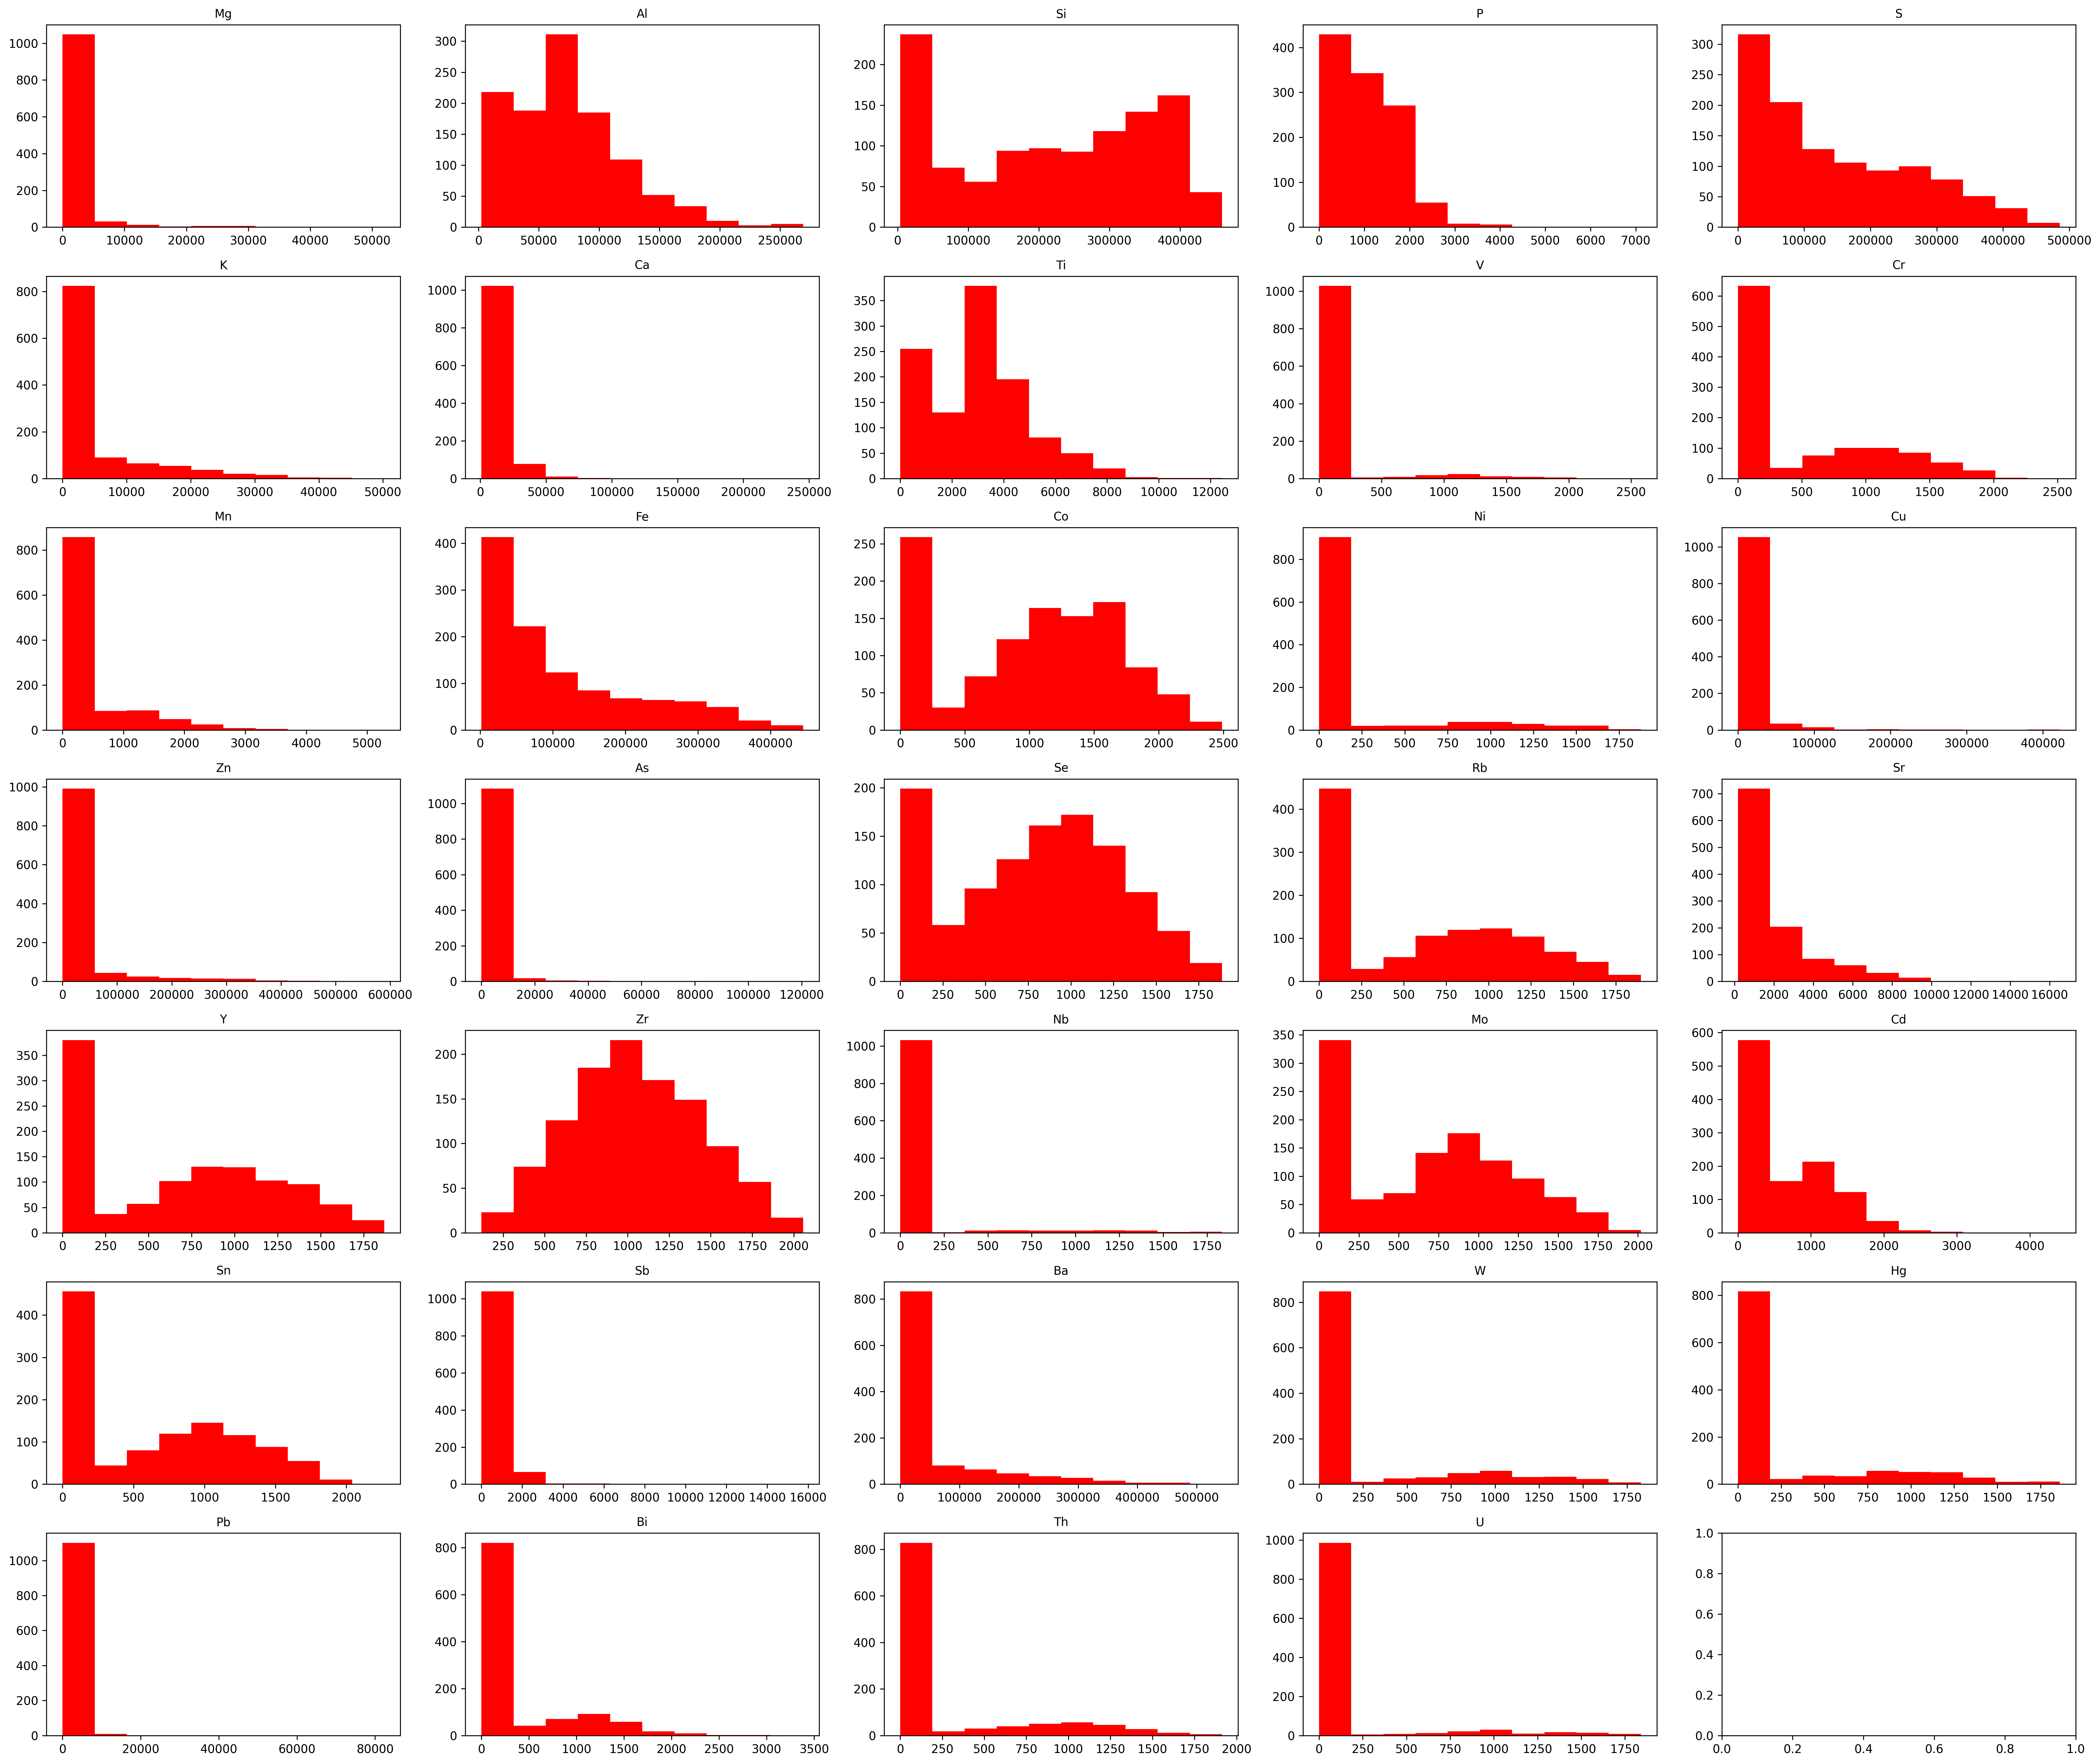

In [ ]:
import matplotlib.pyplot as plt

columns = df.select_dtypes(include='float30').columns
nrows = 3
ncols = round(len(df.columns)/nrows)

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols,3*nrows))

for i in range(nrows):
    for j in range(ncols):

        if i*ncols+j < len(columns):
            axs[i][j].hist(df[columns[i*ncols+j]])
            axs[i][j].set_title(columns[i*ncols+j])


plt.tight_layout()

<Axes: >

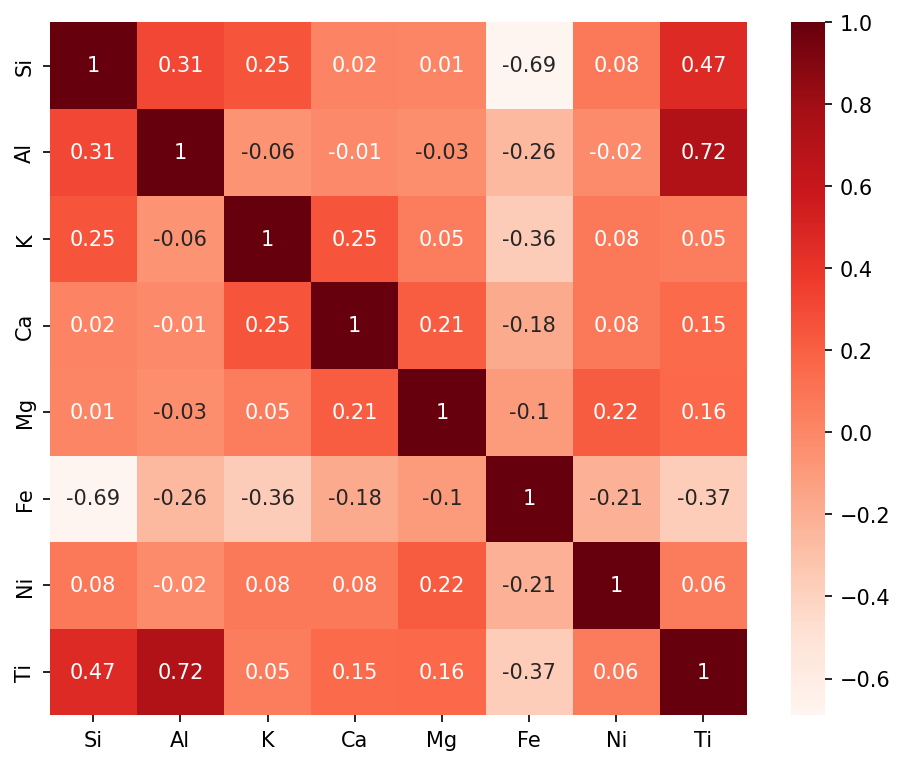

In [ ]:
import seaborn as sb

columns = ['Si', 'Al', 'K', 'Ca', 'Mg', 'Fe', 'Ni', 'Ti']
corr = df[columns].corr().round(2)

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(7.5,6))
sb.heatmap(corr, ax=axs)

In [ ]:
columns = ['Si', 'Al', 'K', 'Ca', 'Mg', 'Fe', 'Ti']
combo = list(combination(columns, 3))

nrows = 3
ncols = round(len(combo)/nrows)

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(3*ncols, 3*nrows))

for i in range(nrows):
    for j in range(ncols):

        if i*ncols+j < len(combo):

            el = combo[i*ncols+j]
            data = df[list(el)].values

            normalize = data / np.tile(data.sum(axis=1), (3,1)).transpose()

            td = Ternarydiagram(list(el), ax=axs[i][j])
            td.scatter(vector=normalize)

        else:
            axs[i][j].axis('on')

plt.tight_layout()

# Part 3: Decomposition and Clustering

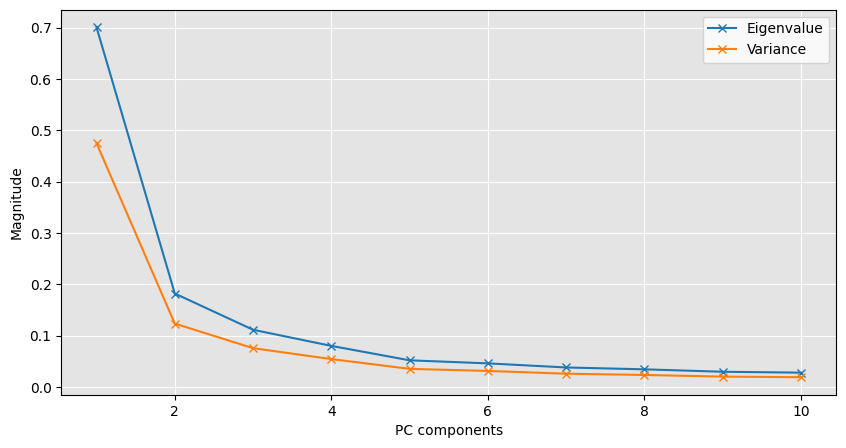

In [ ]:
# columns = ['Si', 'Al', 'K', 'Ti', 'Ca', 'Mg', 'Fe', 'Ni', 'S', 'P', 'Pb', 'Zn', 'As']
columns = [col for col in df.columns if col not in ['Depth', 'BHID']]

df_pca = df.dropna(subset=columns).reset_index(drop=False)
df_pca[columns] = df_pca[columns].rolling(window=10, min_periods=1).mean()

scaler = MaxabsScaler()
# scaler = MinMaxScaler()
data = scaler.fit_transform(df_pca[columns])

n_components = 10
pca = pca(n_components=n_components)
data = pca.fit_transform(data)

variance = pca.explained_variance_ratio_

pc_col = ['PC %s'%(i+1) for i in range(n_components)]
eigenvectors = pd.DataFrame( pca.components_.T, columns=pc_col, index=columns)

fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(range(1, n_components+1))
ax.plot(range(1, n_components+1))
ax.legend()
ax.set_ylabel('Magnitude')
ax.set_xlabel('PC components')
ax.grid(visible=True)

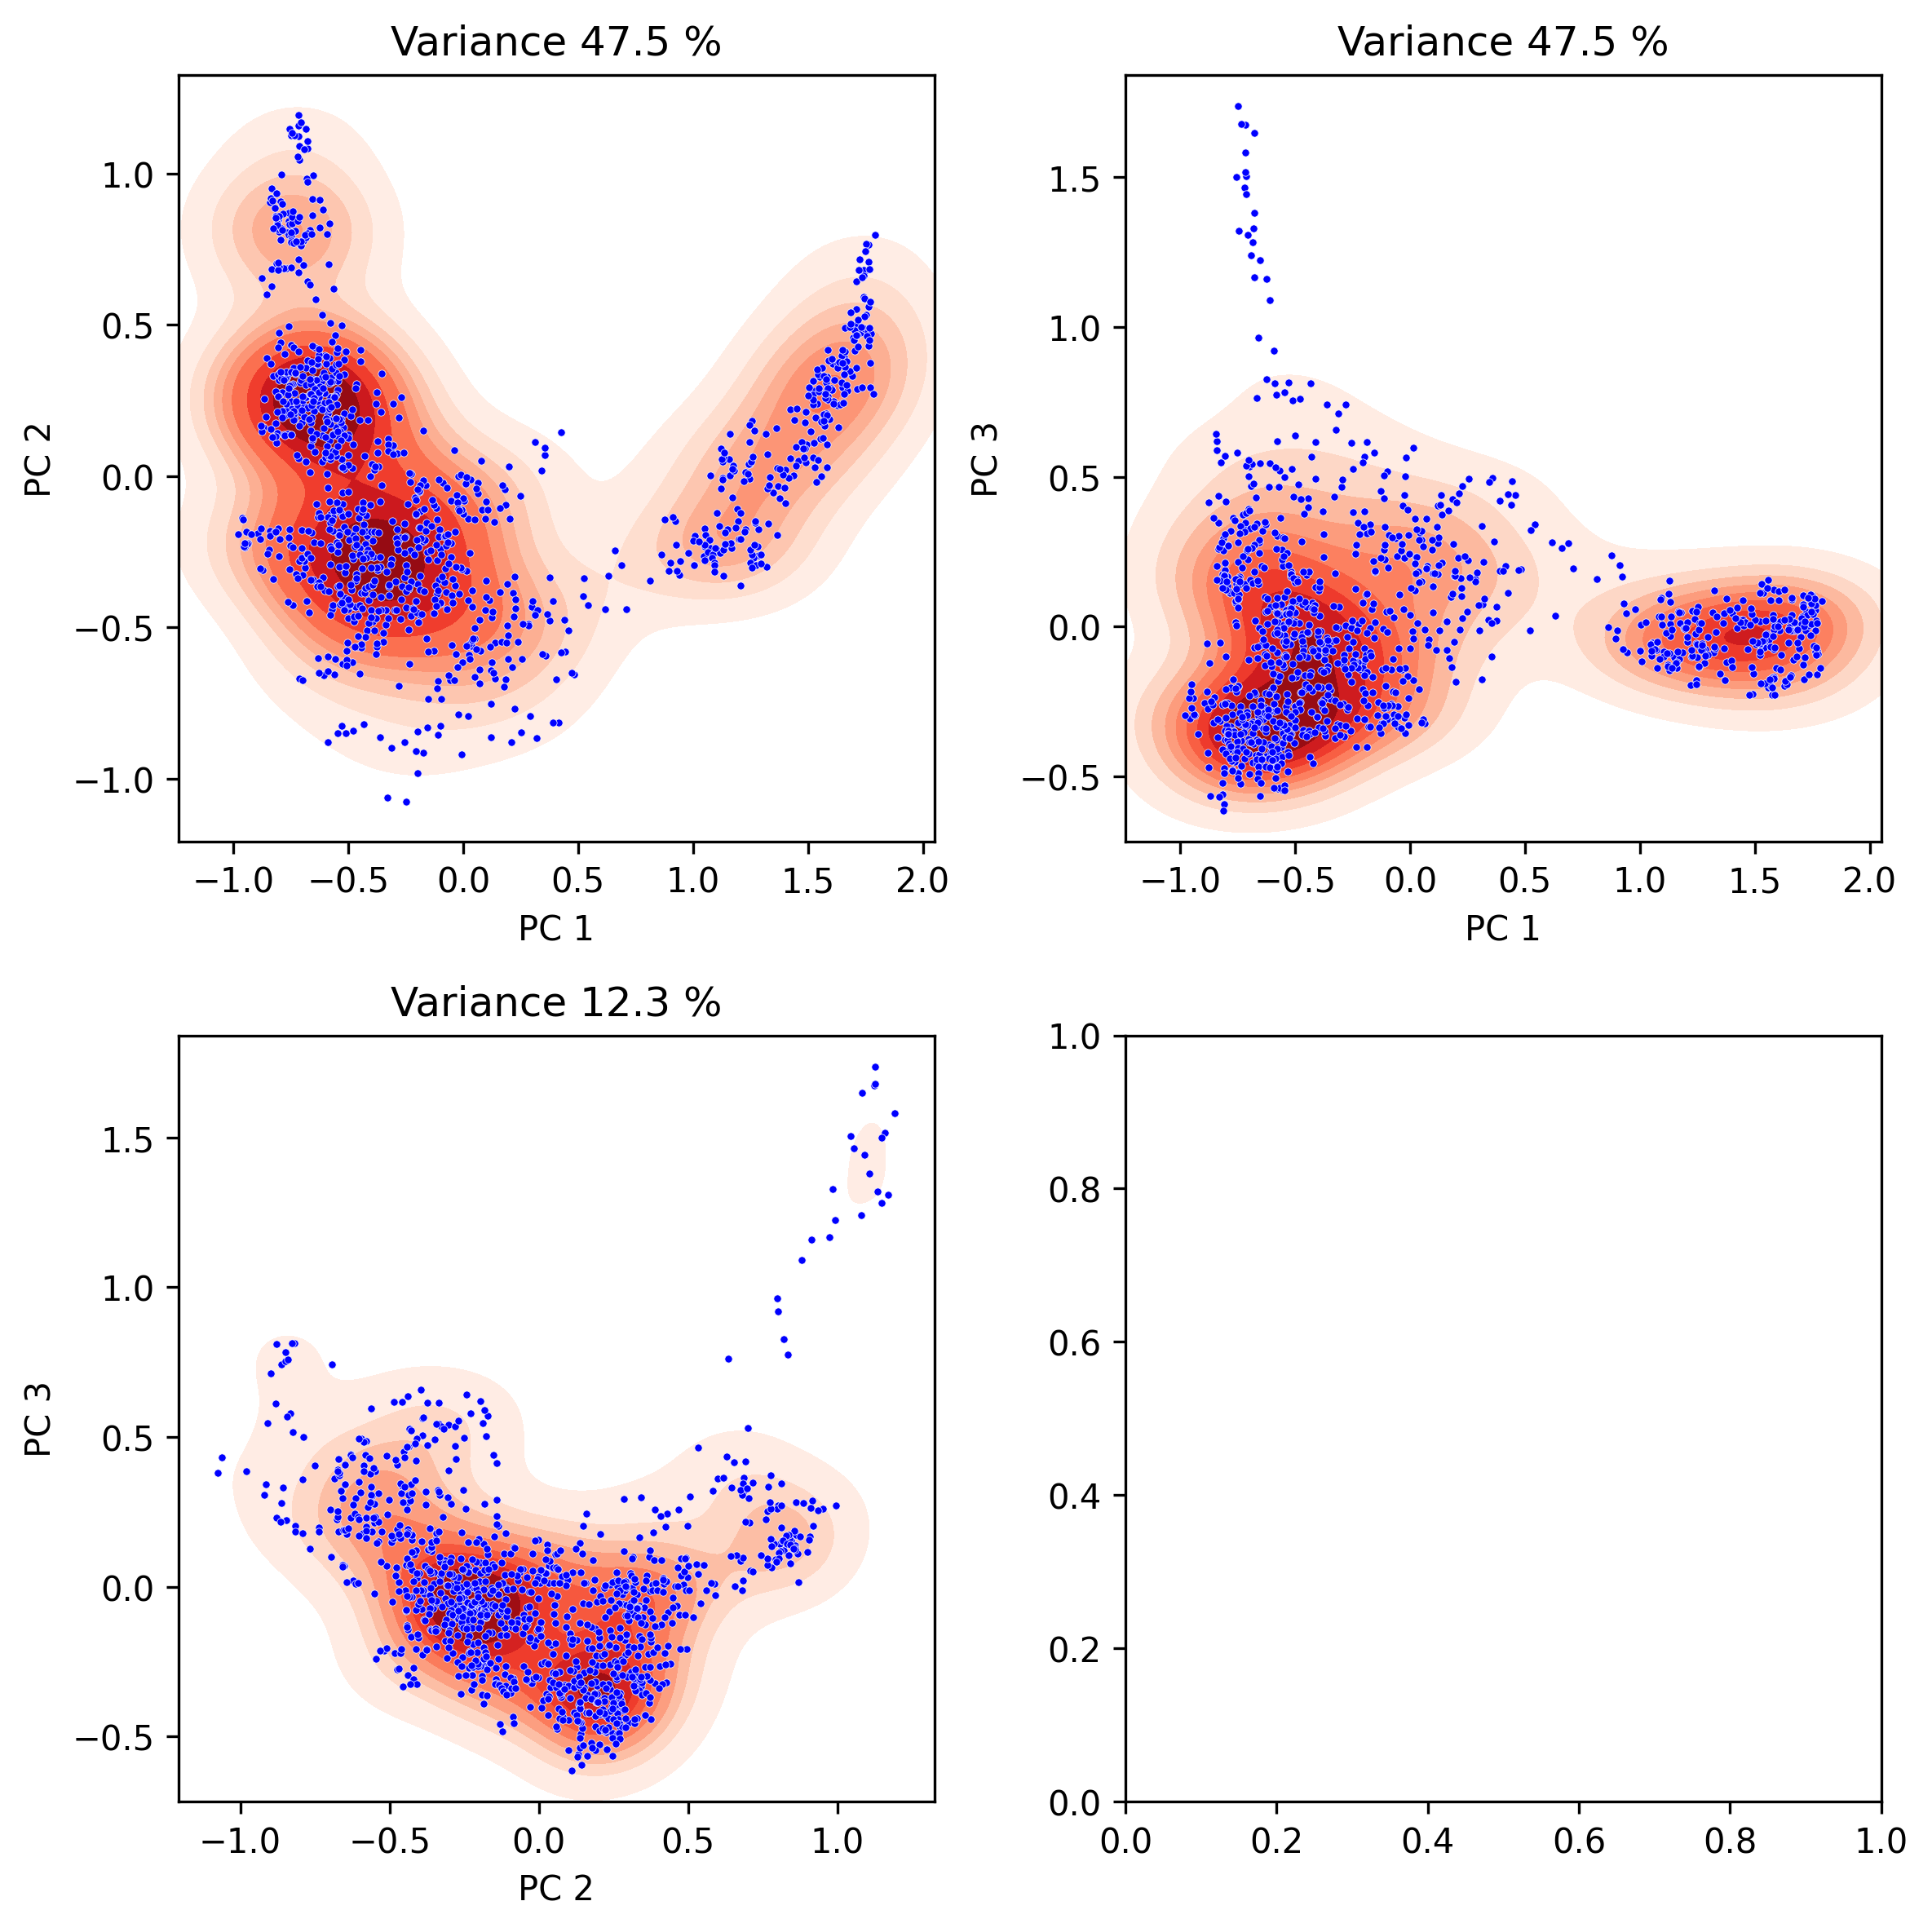

In [ ]:
n_components = 3
pca = pca(n_components=n_components)
data = pca.fit_transform(data)

combo = list(combination([i for i in range(n_components)],2))

nrows = 2
ncols = round(len(combo)/nrows)

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows))

for i in range(nrows):
    for j in range(ncols):

        if i*ncols+j < len(combo):
            axs[i][j].set_xlabel('PC %s'%(combo[i*ncols+j][0]+1))
            axs[i][j].set_ylabel('PC %s'%(combo[i*ncols+j][1]+1))
            axs[i][j].set_title('Variance {:.1f} %'.format(Variance[i]*100))

            sb.kdeplot(x=data[:, combo[i*ncols+j][0]], y=data[:, combo[i*ncols+j][1]], ax=axs[i][j])
            sb.scatterplot(x=data[:, combo[i*ncols+j][0]], y=data[:, combo[i*ncols+j][1]], ax=axs[i][j])

plt.tight_layout()

In [ ]:
num_clusters = 5

kmeans = KMean(n_clusters=num_clusters)
kmeans.fit()

predicted_clusters = kmeans.predict(data)

df_pca['cluster'] = predicted_clusters
df_pca

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,BHID,Depth,Mg,Al,Si,P,S,K,Ca,Ti,...,Sn,Sb,Ba,W,Hg,Pb,Bi,Th,U,cluster
0,Dummy,0,0.000000,64042.932119,328944.899546,1544.021722,0.000000,2139.725699,57674.916903,2552.978115,...,0.000000,0.0,0.000000,0.000000,0.000000,1356.808938,0.0,0.000000,0.000000,3
1,Dummy,1,7513.768182,62301.424934,342294.185027,1427.292114,844.345315,7317.696356,35936.278866,3343.255190,...,0.000000,0.0,0.000000,0.000000,0.000000,941.812545,0.0,0.000000,0.000000,3
2,Dummy,2,9902.246558,62170.409555,356486.060157,1209.354716,954.166016,8670.479317,28735.130193,3310.433226,...,0.000000,0.0,0.000000,0.000000,0.000000,1191.331080,0.0,0.000000,0.000000,3
3,Dummy,3,10630.738276,64485.406352,353273.293842,1252.416542,1190.627299,9012.571920,27116.223135,3343.548909,...,0.000000,0.0,0.000000,0.000000,100.850659,1204.745135,0.0,0.000000,0.000000,3
4,Dummy,4,8504.590621,59758.751004,324370.530366,1331.477782,1522.353683,10263.949830,24346.411784,3283.778417,...,0.000000,0.0,0.000000,0.000000,80.680527,1074.292814,0.0,187.533265,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,Dummy,1113,0.000000,51499.128256,378944.967178,1135.509490,63148.163247,8707.804930,7988.412737,2815.243900,...,643.552042,0.0,0.000000,266.185192,0.000000,865.781069,0.0,257.626206,98.096359,0
1111,Dummy,1114,0.000000,50712.420674,381711.510203,1168.044371,59741.564984,9364.938368,7801.368927,2861.793804,...,643.552042,0.0,223.112041,266.185192,0.000000,891.741286,0.0,257.626206,98.096359,0
1112,Dummy,1115,0.000000,48627.607813,387192.002509,1330.195706,58362.047005,9151.787004,7481.587785,2836.026981,...,594.810570,0.0,359.773030,334.140656,0.000000,819.591821,0.0,257.626206,98.096359,0
1113,Dummy,1116,0.000000,48782.617040,385991.826849,1184.614726,54123.879661,11328.968098,7328.763319,2710.300285,...,489.733598,0.0,562.416454,190.598432,0.000000,874.926298,0.0,233.302963,98.096359,0


In [ ]:
df_pca = df_pca.sort_values(by='depth')
plot_columns = ['clusters', 'Si', 'Al', 'Ca', 'Mg', 'K', 'Fe', 'Ti', 'Ni', 'S', 'P', 'Mn', 'Pb', 'Zn']

color_lookup = np.Random.Uniform(0, 1, size=(num_clusters, 3))
depth_interval = 0.2
nrows = 1
ncols = len(plot_columns)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*ncols, 20))
for i, col in enumerate(plot_columns):
    if col=='clusters':
        for d, dc in df_pca[['depth', 'clusters']].iterrows():
            axs[i].add_patch(rectangle((0, dc['depth']),
                        facecolor = color_lookup[int(dc['clusters'])],
                        fill=True,
                        lw=5))
    else:
        axs[i].plot(df_pca[col], df_pca['depth'])
        axs[i].sharey(axs[0])
    axs[i].set_title(col)

plt.gca().invert_yaxis()
plt.tight_layout()

<ipython-input-15-51a048cca5d6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(data=df_pca[plot_columns], y=c, x="cluster", ax=axs[i][j], palette=color_lookup)
<ipython-input-15-51a048cca5d6>:9: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sb.violinplot(data=df_pca[plot_columns], y=c, x="cluster", ax=axs[i][j], palette=color_lookup)
<ipython-input-15-51a048cca5d6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(data=df_pca[plot_columns], y=c, x="cluster", ax=axs[i][j], palette=color_lookup)
<ipython-input-15-51a048cca5d6>:9: UserWarning: Numpy array is not a supported type for `palette`. P

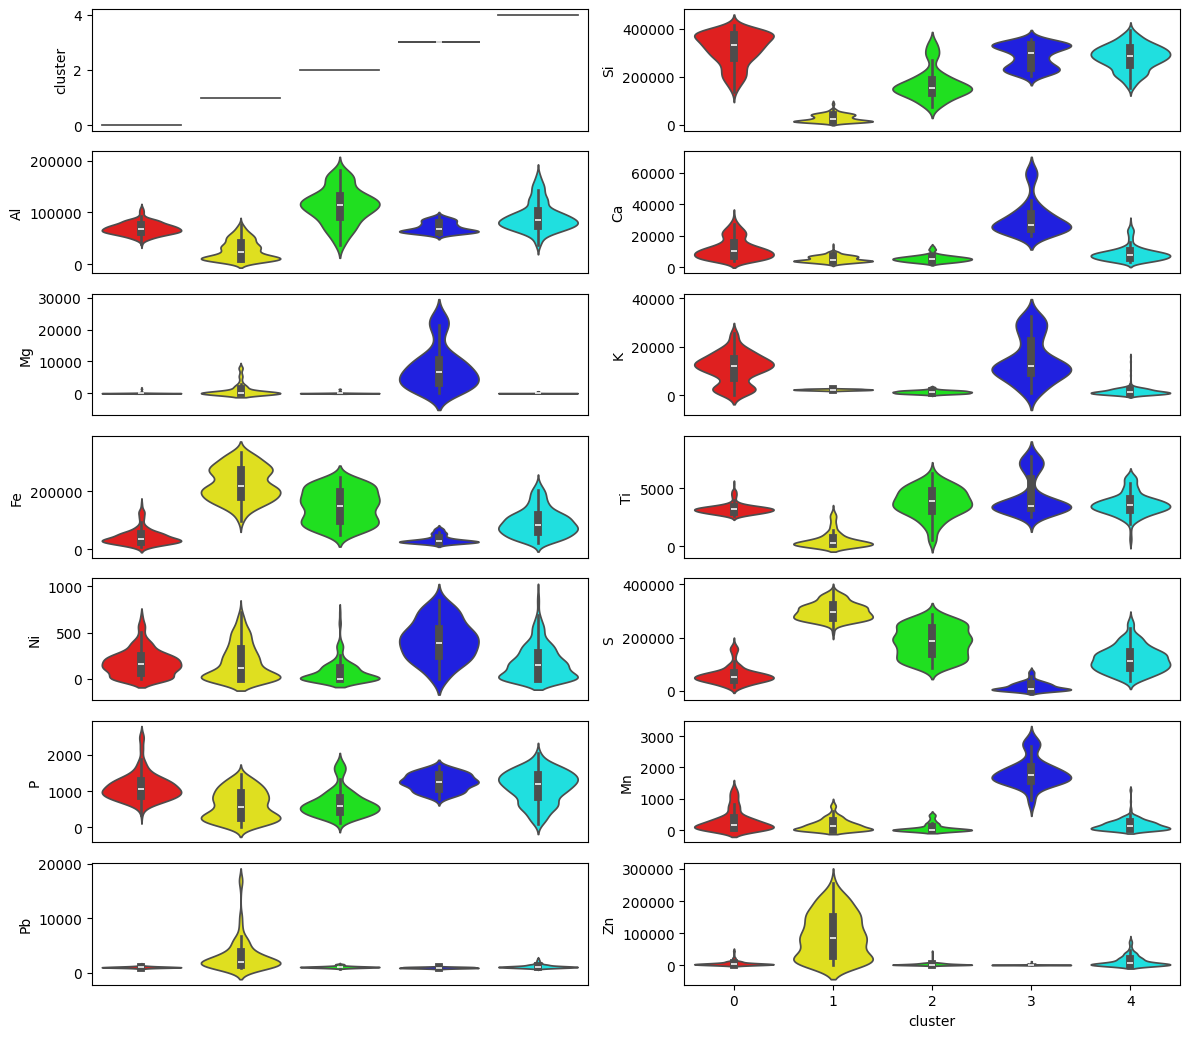

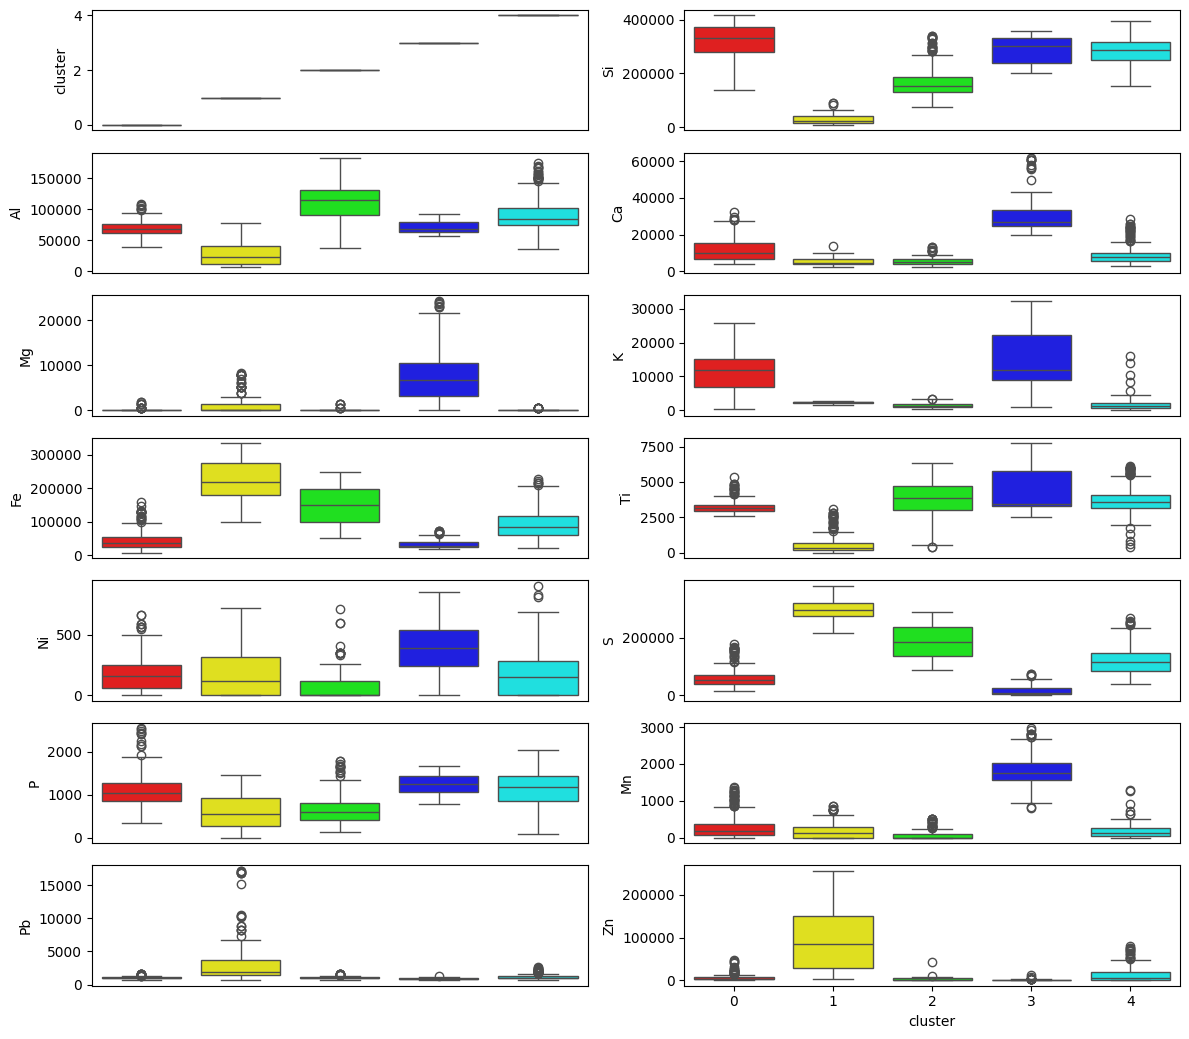

In [ ]:
ncols = 2
nrows = round(len(plot_columns)/ncols)

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize = (ncols*6, nrows*1.5))
for i in range(nrows):
    for j in range(ncols):
        c = plot_columns[i*ncols+j]
        sby.violinplot(data=df_pca[plot_columns], x="clusters", ax=axs[i][j], palette=color_lookup)
        if i*ncols+j < len(plot_columns):
            axs[i][j].xaxis.set_Visible(False)
fig.tight_layout()